In [1]:
import mlflow, numpy as np, tempfile, boto3, os, pickle, xarray as xr
from matplotlib import pyplot as plt
from jax import vmap
mlflow.set_tracking_uri("https://continuum.ergodic.io/experiments/")

In [3]:
loss_values = xr.open_dataarray("loss_values.nc")
num_color_values = xr.open_dataarray("num_color_loss_values.nc")


In [5]:
num_color_values

<xarray.DataArray (temperature: 5, intensity: 4, gsl: 4, num_colors: 11)> Size: 7kB
[880 values with dtype=float64]
Coordinates:
  * num_colors   (num_colors) float64 88B 1.0 2.0 3.0 4.0 ... 8.0 9.0 10.0 11.0
  * temperature  (temperature) float64 40B 2e+03 2.5e+03 3e+03 3.5e+03 4e+03
  * intensity    (intensity) float64 32B 1e+14 4e+14 7e+14 1e+15
  * gsl          (gsl) float64 32B 200.0 333.3 466.7 600.0

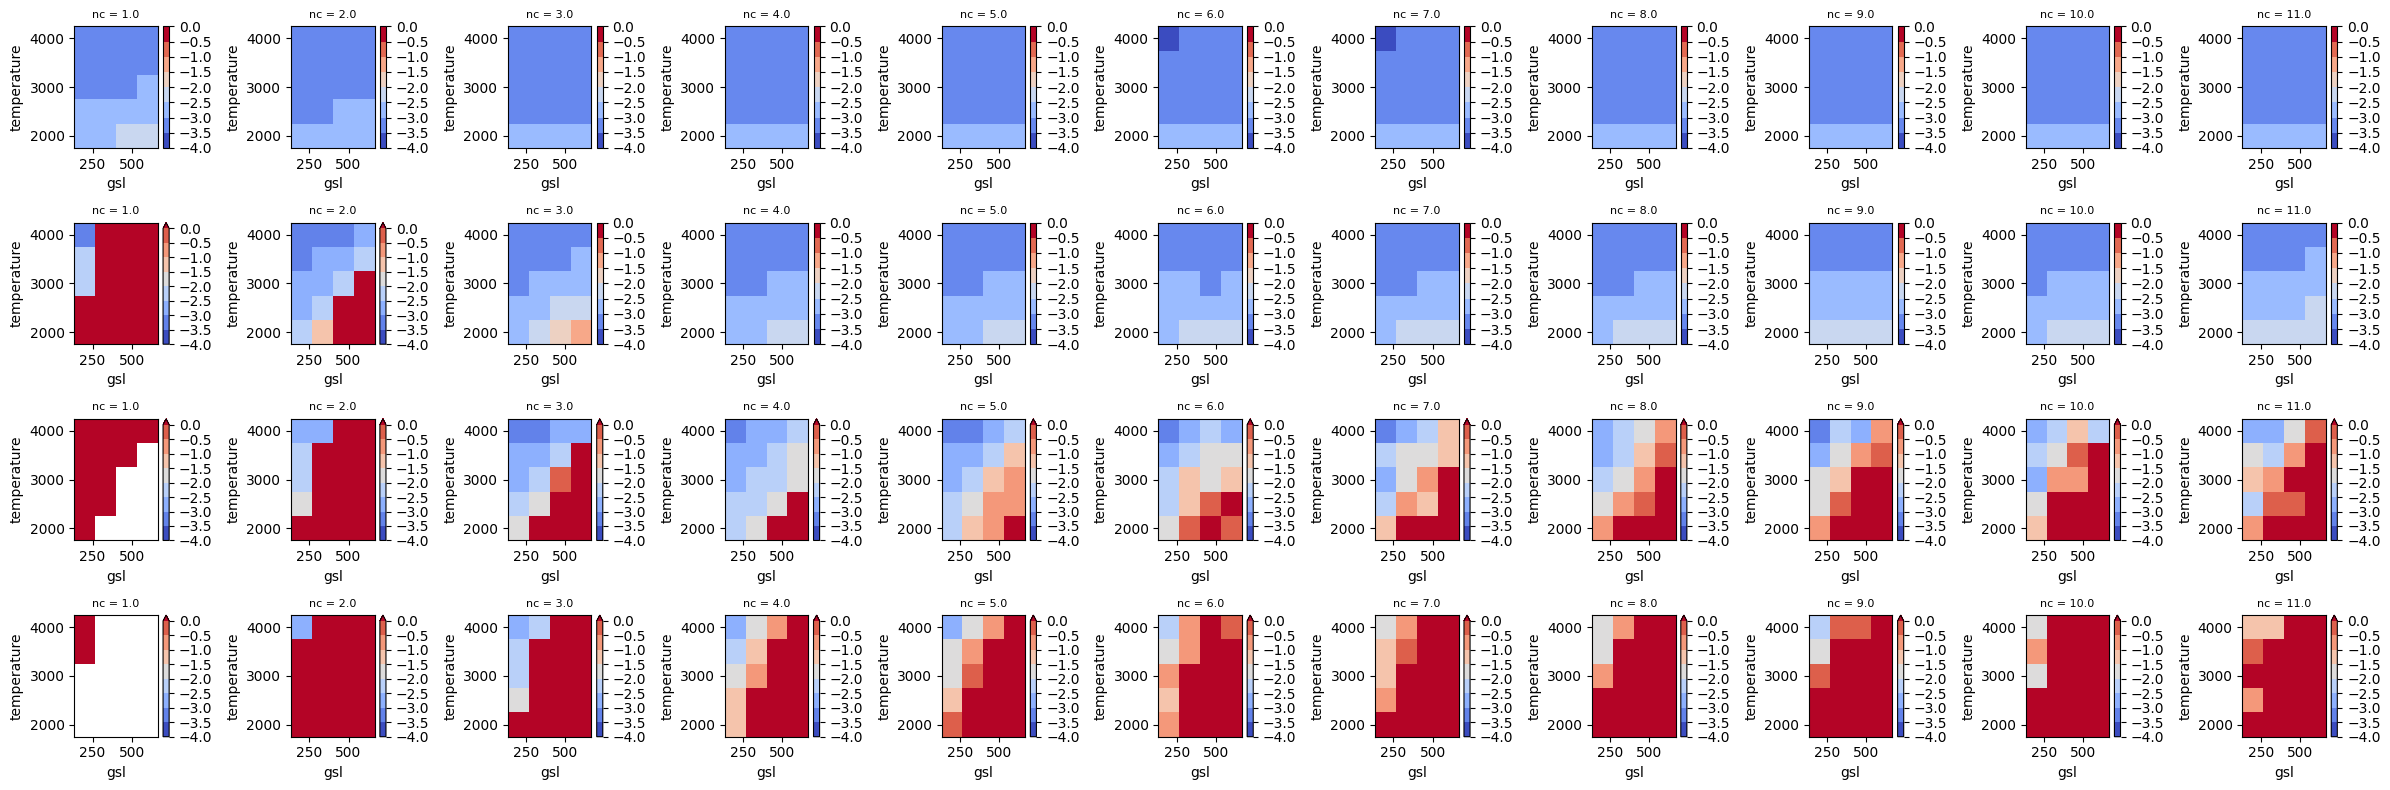

In [9]:
fig, ax = plt.subplots(4, 11, figsize=(24, 8), tight_layout=True)

intensities = loss_values.coords["intensity"].data
ncs = num_color_values.coords["num_colors"].data


for int_ind, intensity in enumerate(intensities):
    for plot_ind, nc in enumerate(ncs):
        plot_arr = num_color_values.loc[{"intensity": intensity, "num_colors": nc}]
        plot_arr.plot(ax=ax[int_ind, plot_ind], cmap="coolwarm", levels=np.linspace(-4, 0, 9))
        ax[int_ind, plot_ind].set_title(f"nc = {nc}", fontsize=8)

In [19]:
opt_num_colors = num_color_values.idxmin("num_colors")
opt_num_color_vals = num_color_values.min("num_colors")

Text(0.5, 1.0, 'loss - optimal spacing (1 seed)')

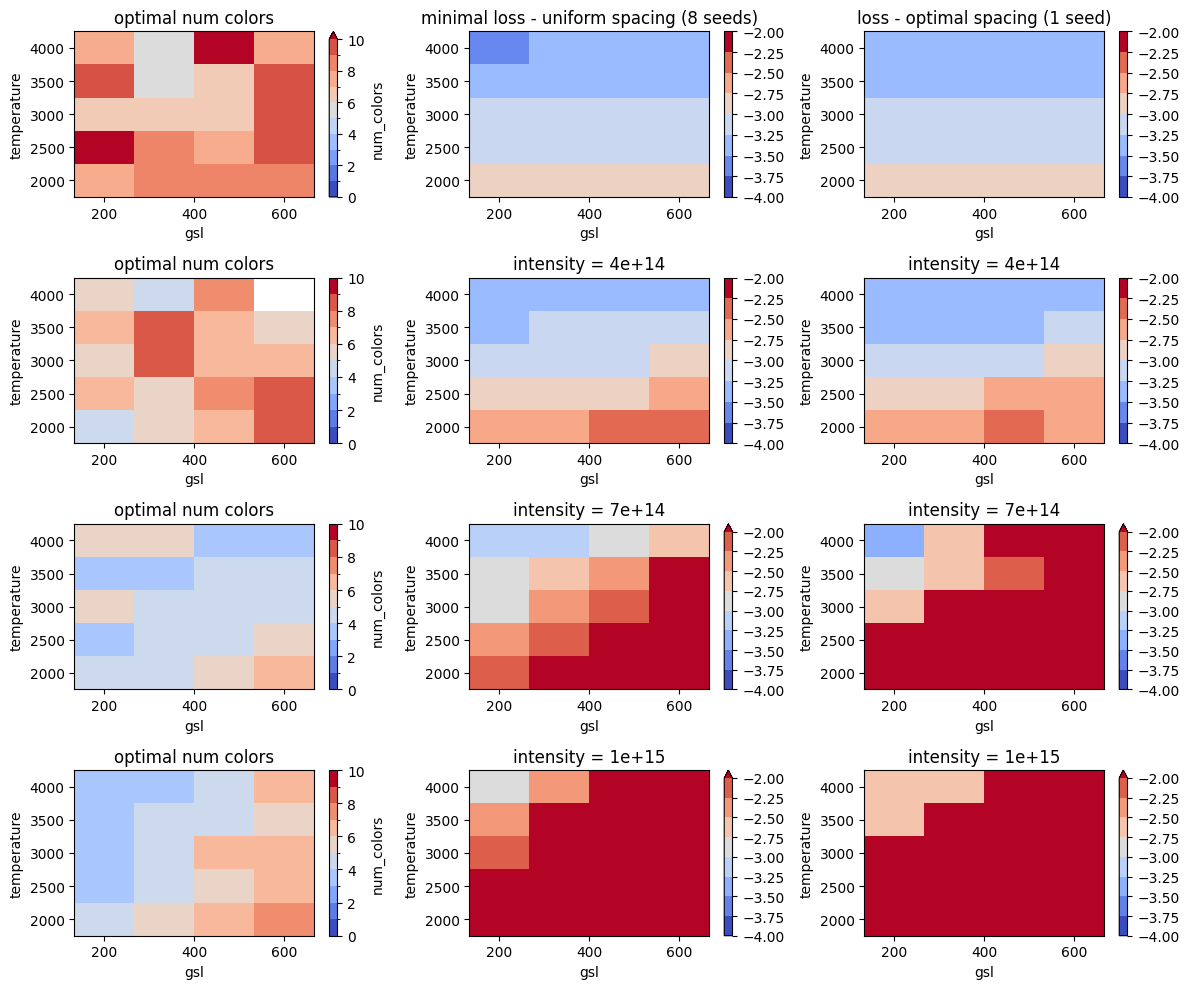

In [27]:
fig, ax = plt.subplots(4, 3, figsize=(12, 10), tight_layout=True)
for int_ind, intensity in enumerate(intensities):
    opt_num_colors.loc[{"intensity": intensity}].plot(ax=ax[int_ind, 0], cmap="coolwarm", levels=np.linspace(0, 10, 11))
    ax[int_ind, 0].set_title(f"optimal num colors", fontsize=12)
    # ax[int_ind, 0].set_ylabel(f"intensity = {intensity}")

    opt_num_color_vals.loc[{"intensity": intensity}].plot(ax=ax[int_ind, 1], cmap="coolwarm", levels=np.linspace(-4, -2, 9))
    loss_values.loc[{"intensity": intensity}].plot(ax=ax[int_ind, 2], cmap="coolwarm", levels=np.linspace(-4, -2, 9))

ax[0, 1].set_title(f"minimal loss - uniform spacing (8 seeds)", fontsize=12)    
ax[0, 2].set_title(f"loss - optimal spacing (1 seed)", fontsize=12)